# Pipeline de Classificação de Texto

### Etapa 00 - Base de dados

In [1]:
#Criando a base de dados a ser utilizada
import pandas as pd

data = {
  'texto': [
    "Este é um otimo filme!",
    "O produto é muito ruim.",
    "Adorei o atendimento ao cliente.",
    "A entrega atrasou e o produto veio com defeito.",
    "Recomendo este livro a todos!",
    "Não gostei da experiência.",
    "O serviço foi excelente.",
    "Péssima qualidade, não comprem!",
    "Amei o presente, muito obrigado!",
    "Que decepcao, perdi meu dinheiro."
  ],
  'categoria': [
    "positivo",
    "negativo",
    "positivo",
    "negativo",
    "positivo",
    "negativo",
    "positivo",
    "negativo",
    "positivo",
    "negativo"
  ]
}

df = pd.DataFrame(data)

df.to_csv('dados_rotulados.csv', index=False, encoding='utf-8')

print("Base de dados criada e salva em 'dados_rotulados.csv'")

Base de dados criada e salva em 'dados_rotulados.csv'


### Etapa 01 - Preparação dos dados

In [2]:
import nltk
import spacy
import sklearn
import pandas as pd
import matplotlib.pyplot as plt
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
from sklearn.model_selection import train_test_split

#nltk.download('stopwords')
#nltk.download('punkt_tab')

Informacoes do conjunto de dados:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   texto      10 non-null     object
 1   categoria  10 non-null     object
dtypes: object(2)
memory usage: 292.0+ bytes
None

Primeiras 5 linhas do conjunto de dados:
                                             texto categoria
0                           Este é um otimo filme!  positivo
1                          O produto é muito ruim.  negativo
2                 Adorei o atendimento ao cliente.  positivo
3  A entrega atrasou e o produto veio com defeito.  negativo
4                    Recomendo este livro a todos!  positivo


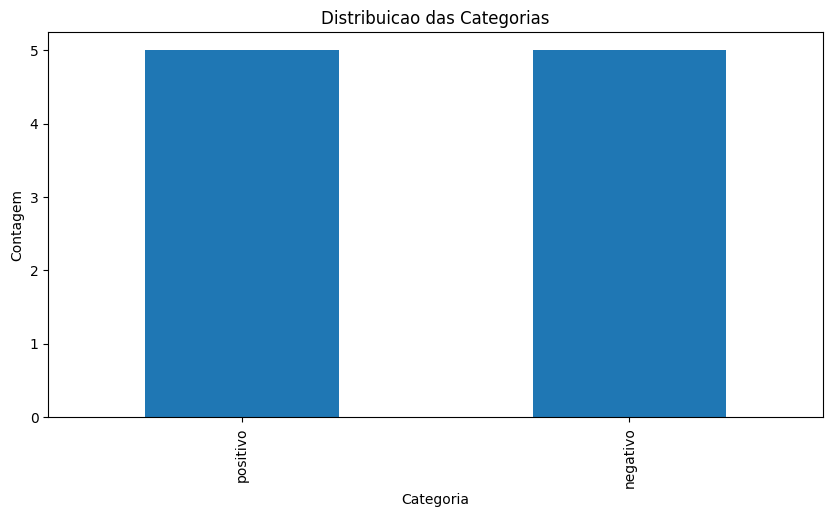

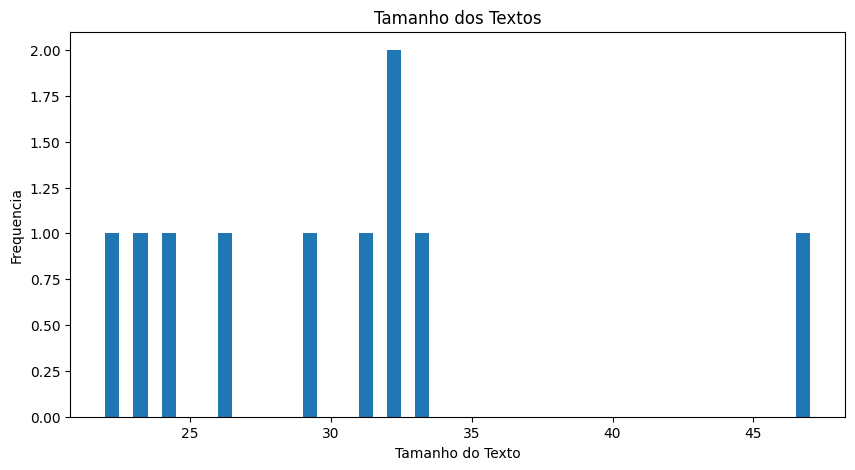

In [ ]:
# Carregar o conjunto de dados de texto rotulado
data = pd.read_csv('dados_rotulados.csv', encoding='utf-8')

print("Informacoes do conjunto de dados:")
print(data.info())

print("\nPrimeiras 5 linhas do conjunto de dados:")
print (data.head())

# Categorias
plt.figure(figsize=(10, 5))
data['categoria'].value_counts().plot(kind='bar')
plt.title('Distribuicao das Categorias')
plt.xlabel('Categoria')
plt.ylabel('Contagem' )
plt. show()

# Tamanho
tamanhos_textos = data['texto' ].apply(len)
plt.figure(figsize=(10, 5))
plt.hist (tamanhos_textos, bins=50)
plt.title('Tamanho dos Textos')
plt.xlabel('Tamanho do Texto' )
plt.ylabel('Frequencia')
plt.show()

In [ ]:
def preprocessar_texto(texto):
  texto = texto. translate(str.maketrans('', '', string.punctuation))
  texto = ''.join([c for c in texto if not c.isdigit()])

  tokens = word_tokenize(texto.lower())

  stop_words = set(stopwords.words('portuguese'))
  tokens = [palavra for palavra in tokens if palavra not in stop_words]

  stemmer = SnowballStemmer('portuguese')
  tokens = [stemmer.stem(palavra) for palavra in tokens]
  return ' '.join(tokens)

data['texto_processado' ] = data['texto' ].apply(preprocessar_texto)

X_train, X_test, y_train, y_test = train_test_split(
  data['texto_processado' ], data['categoria' ], test_size=0.2, random_state=42)

print("\nTamanho do conjunto de treinamento:", len(X_train))
print("Tamanho do conjunto de teste:", len(X_test) )


Tamanho do conjunto de treinamento: 8
Tamanho do conjunto de teste: 2


### Etapa 02 - Extração de características

In [ ]:
from sklearn. feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer. transform(X_test)

print("\nNumero de caracteristicas extraidas:", X_train_tfidf.shape[1])

modelo = MultinomialNB()
modelo.fit(X_train_tfidf, y_train)

y_pred = modelo.predict(X_test_tfidf)
acuracia = accuracy_score(y_test, y_pred)
print("\nAcuracia do modelo:", acuracia)
print("\nRelatorio de Classificacao:\n", classification_report(y_test, y_pred) )


Numero de caracteristicas extraidas: 23

Acuracia do modelo: 0.5

Relatorio de Classificacao:
               precision    recall  f1-score   support

    negativo       0.50      1.00      0.67         1
    positivo       0.00      0.00      0.00         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
def classificar_texto(texto, vectorizer, modelo):
  texto_processado = preprocessar_texto(texto)
  texto_tfidf = vectorizer. transform([texto_processado])

  categoria_prevista = modelo.predict(texto_tfidf)[0]
  probabilidades = modelo.predict_proba(texto_tfidf)[0]

  categorias = modelo.classes_
  probabilidades_por_categoria = dict(zip(categorias, probabilidades))
  return categoria_prevista, probabilidades_por_categoria

novo_texto = "Este filme e incrivel, recomendo a todos!"
categoria, probabilidades = classificar_texto(novo_texto, vectorizer, modelo)
print("Novo texto:", novo_texto)
print("Categoria prevista:", categoria)
print("Probabilidades por categoria:", probabilidades)

Novo texto: Este filme e incrivel, recomendo a todos!
Categoria prevista: positivo
Probabilidades por categoria: {np.str_('negativo'): np.float64(0.29256806327043555), np.str_('positivo'): np.float64(0.7074319367295648)}


### Etapa 03 - Treinamento de um modelo

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

naive_bayes_model = MultinomialNB()
svm_model = SVC(random_state=42, probability=True)

naive_bayes_model.fit(X_train_tfidf, y_train)
svm_model.fit(X_train_tfidf, y_train)

param_grid_nb = {}

param_grid_svm = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf' ]}
grid_search_svm = GridSearchCV(svm_model, param_grid_svm, cv=2)

In [ ]:
grid_search_svm.fit(X_train_tfidf, y_train)

print("Melhores hiperparametros para SVM:", grid_search_svm.best_params_)

best_svm_model = grid_search_svm.best_estimator_

print("\nResultados da avaliação:")

# Naive Bayes
y_pred_nb = naive_bayes_model.predict(X_test_tfidf)
acuracia_nb = accuracy_score(y_test, y_pred_nb)
print("\nNaive Bayes Multinomial:")
print("Acurácia:", acuracia_nb)
print("Relatório de Classificacão:\n", classification_report(y_test, y_pred_nb))

# SVM
y_pred_svm = best_svm_model.predict(X_test_tfidf)
acuracia_svm = accuracy_score(y_test, y_pred_svm)
print("\nSVM:")
print("Acurácia:", acuracia_svm)
print("Relatório de Classificacão:\n", classification_report(y_test, y_pred_svm) )


def classificar_texto(texto, vectorizer, modelo):
  texto_processado = preprocessar_texto(texto)
  texto_tfidf = vectorizer. transform([texto_processado])

  categoria_prevista = modelo.predict(texto_tfidf)[0]
  probabilidades = modelo.predict_proba(texto_tfidf)[0]

  categorias = modelo.classes_
  probabilidades_por_categoria = dict(zip(categorias, probabilidades))
  return categoria_prevista, probabilidades_por_categoria

Melhores hiperparametros para SVM: {'C': 1, 'kernel': 'rbf'}

Resultados da avaliação:

Naive Bayes Multinomial:
Acurácia: 0.5
Relatório de Classificacão:
               precision    recall  f1-score   support

    negativo       0.50      1.00      0.67         1
    positivo       0.00      0.00      0.00         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2


SVM:
Acurácia: 1.0
Relatório de Classificacão:
               precision    recall  f1-score   support

    negativo       1.00      1.00      1.00         1
    positivo       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
novo_texto = "Este filme e incrivel, recomendo a todos!"
categoria_nb, probabilidades_nb = classificar_texto(novo_texto, vectorizer, naive_bayes_model)
categoria_svm, probabilidades_svm = classificar_texto(novo_texto, vectorizer, best_svm_model)

print("\nNovo texto:", novo_texto)
print("\nResultados da classificação:")
print("\nNaive Bayes Multinomial:")
print("Categoria prevista:", categoria_nb)
print("Probabilidades por categoria:", probabilidades_nb)
print("\nSVM:")
print("Categoria prevista:", categoria_svm)
print("Probabilidades por categoria:", probabilidades_svm)


Novo texto: Este filme e incrivel, recomendo a todos!

Resultados da classificação:

Naive Bayes Multinomial:
Categoria prevista: positivo
Probabilidades por categoria: {np.str_('negativo'): np.float64(0.29256806327043555), np.str_('positivo'): np.float64(0.7074319367295648)}

SVM:
Categoria prevista: positivo
Probabilidades por categoria: {'negativo': np.float64(0.8817303978937229), 'positivo': np.float64(0.11826960210627731)}


### Etapa 04 - Avaliação do modelo


Etapa 4: Avaliação do Modelo

Resultados da Avaliação:

Naive Bayes Multinomial:
Acurácia: 0.5
Relatorio de Classificacao:
               precision    recall  f1-score   support

    negativo       0.50      1.00      0.67         1
    positivo       0.00      0.00      0.00         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2


SVM:
Acurácia: 1.0
Relatorio de Classificacao:
               precision    recall  f1-score   support

    negativo       1.00      1.00      1.00         1
    positivo       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2


Comparação de Modelos:
- Acurácia Naive Bayes:  0.5000
- Acurácia SVM:  1.0000


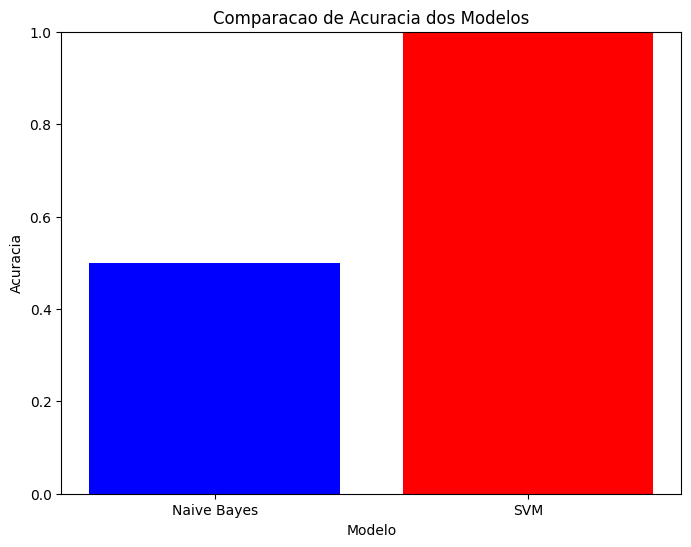

In [ ]:
print("\nEtapa 4: Avaliação do Modelo")
print("\nResultados da Avaliação:")

# Naive Bayes
y_pred_nb = naive_bayes_model.predict(X_test_tfidf)
acuracia_nb = accuracy_score(y_test, y_pred_nb)
print("\nNaive Bayes Multinomial:")
print ("Acurácia:", acuracia_nb)
print("Relatorio de Classificacao:\n", classification_report(y_test, y_pred_nb, zero_division=0))

# SVM
y_pred_svm = best_svm_model.predict(X_test_tfidf)
acuracia_svm = accuracy_score(y_test, y_pred_svm)
print("\nSVM:")
print("Acurácia:", acuracia_svm)
print ("Relatorio de Classificacao:\n", classification_report(y_test, y_pred_svm, zero_division=0))

print("\nComparação de Modelos:")
print(f"- Acurácia Naive Bayes: {acuracia_nb: .4f}")
print (f"- Acurácia SVM: {acuracia_svm: .4f}")

modelos = ['Naive Bayes', 'SVM' ]
acuracias = [acuracia_nb, acuracia_svm]

plt.figure(figsize=(8, 6))
plt.bar(modelos, acuracias, color=['blue', 'red' ])
plt.xlabel('Modelo')
plt.ylabel('Acuracia')
plt.title('Comparacao de Acuracia dos Modelos')
plt.ylim(0, 1)
plt.show()

### Etapa 05 - Classificação de um novo texto

In [ ]:
print("\nEtapa 5: Classificacao de um Novo Texto")

def classificar_novo_texto(texto, vectorizer, modelo):
  texto_processado = preprocessar_texto(texto)
  texto_tfidf = vectorizer. transform([texto_processado])

  categoria_prevista = modelo.predict(texto_tfidf)[0]
  try:
    probabilidades = modelo.predict_proba(texto_tfidf)[0]
    categorias = modelo.classes_
    probabilidades_por_categoria = dict(zip(categorias, probabilidades))
    return categoria_prevista, probabilidades_por_categoria
  except AttributeError:
    return categoria_prevista, {}

In [ ]:
novo_texto = "Este filme é incrivel, recomendo a todos!"

print("\nNovo Texto:", novo_texto)
print("\nResultados da Classificação:")

# Naive Bayes
categoria_nb, probabilidades_nb = classificar_novo_texto(novo_texto, vectorizer, naive_bayes_model)
print("\nNaive Bayes:")
print(" Categoria Prevista:", categoria_nb)
if probabilidades_nb:
  print("Probabilidades:", probabilidades_nb)

# CSVM
categoria_svm, probabilidades_svm = classificar_novo_texto(novo_texto, vectorizer, best_svm_model)
print("\nSVM:")
print(" Categoria Prevista:", categoria_svm)
if probabilidades_svm:
  print("Probabilidades:", probabilidades_svm)


Novo Texto: Este filme é incrivel, recomendo a todos!

Resultados da Classificação:

Naive Bayes:
 Categoria Prevista: positivo
Probabilidades: {np.str_('negativo'): np.float64(0.29256806327043555), np.str_('positivo'): np.float64(0.7074319367295648)}

SVM:
 Categoria Prevista: positivo
Probabilidades: {'negativo': np.float64(0.8817303978937229), 'positivo': np.float64(0.11826960210627731)}
